In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
TRAIN_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/train'
VALIDATION_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/val'
TEST_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/test'

TRAIN_SAMPLES = 3334 # train의 이미지 갯수
VALIDATAION_SAMPLES = 199 # validation의 이미지 갯수
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224

params = {
    'batch_size' : [32, 16],
    'learning_rate' : [0.00001, 0.00005]
}

In [8]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
#   print(base_model.summary())
 
    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

In [9]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model_final = model_maker()

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/50
104/104 [==============================] - 96s 918ms/step - loss: 0.7027 - acc: 0.7626 - val_loss: 0.8484 - val_acc: 0.6875
Epoch 2/50
104/104 [==============================] - 94s 909ms/step - loss: 0.5693 - acc: 0.7777 - val_loss: 0.7824 - val_acc: 0.7292
Epoch 3/50
104/104 [==============================] - 96s 925ms/step - loss: 0.5037 - acc: 0.8001 - val_loss: 0.7383 - val_acc: 0.7604
Epoch 4/50
104/104 [==============================] - 94s 899ms/step - loss: 0.4451 - acc: 0.8095 - val_loss: 0.6783 - val_acc: 0.7812
Epoch 5/50
104/104 [==============================] - 97s 929ms/step - loss: 0.4159 - acc: 0.8219 - val_loss: 0.6251 - val_acc: 0.8073
Epoch 6/50
104/104 [==============================] - 94s 907ms/step - loss: 0.3712 - acc: 0.8495 - val_loss: 0.5852 - val_acc: 0.8281
Epoch 7/50
104/104 [==============================] - 94s 905ms/step - loss: 0.3452 - acc: 0.8625 - val_los

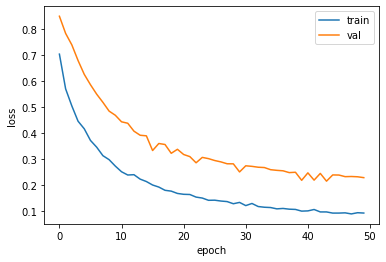

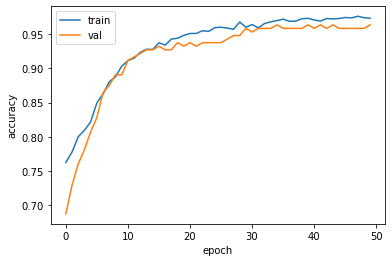

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/50
104/104 [==============================] - 95s 906ms/step - loss: 0.0903 - acc: 0.9712 - val_loss: 0.2280 - val_acc: 0.9635
Epoch 2/50
104/104 [==============================] - 93s 889ms/step - loss: 0.0785 - acc: 0.9797 - val_loss: 0.2219 - val_acc: 0.9635
Epoch 3/50
104/104 [==============================] - 93s 894ms/step - loss: 0.0802 - acc: 0.9767 - val_loss: 0.2272 - val_acc: 0.9635
Epoch 4/50
104/104 [==============================] - 92s 887ms/step - loss: 0.0686 - acc: 0.9846 - val_loss: 0.2140 - val_acc: 0.9635
Epoch 5/50
104/104 [==============================] - 93s 896ms/step - loss: 0.0736 - acc: 0.9788 - val_loss: 0.2259 - val_acc: 0.9688
Epoch 6/50
104/104 [==============================] - 93s 898ms/step - loss: 0.0691 - acc: 0.9781 - val_loss: 0.2317 - val_acc: 0.9635
Epoch 7/50
104/104 [==============================] - 94s 897ms/step - loss: 0.0727 - acc: 0.9782 - val_los

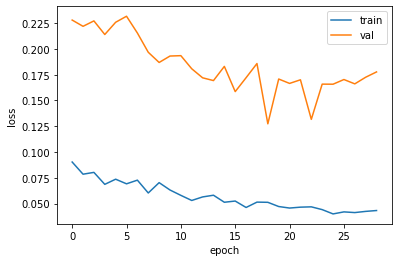

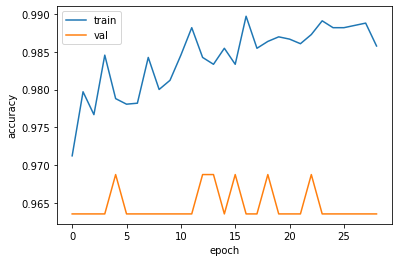

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/50
208/208 [==============================] - 99s 456ms/step - loss: 0.0414 - acc: 0.9892 - val_loss: 0.1671 - val_acc: 0.9635
Epoch 2/50
208/208 [==============================] - 94s 452ms/step - loss: 0.0379 - acc: 0.9895 - val_loss: 0.1633 - val_acc: 0.9635
Epoch 3/50
208/208 [==============================] - 96s 461ms/step - loss: 0.0411 - acc: 0.9858 - val_loss: 0.1605 - val_acc: 0.9635
Epoch 4/50
208/208 [==============================] - 95s 456ms/step - loss: 0.0399 - acc: 0.9861 - val_loss: 0.1594 - val_acc: 0.9635
Epoch 5/50
208/208 [==============================] - 94s 452ms/step - loss: 0.0446 - acc: 0.9870 - val_loss: 0.1332 - val_acc: 0.9688
Epoch 6/50
208/208 [==============================] - 93s 447ms/step - loss: 0.0405 - acc: 0.9876 - val_loss: 0.1196 - val_acc: 0.9688
Epoch 7/50
208/208 [==============================] - 94s 450ms/step - loss: 0.0345 - acc: 0.9907 - val_los

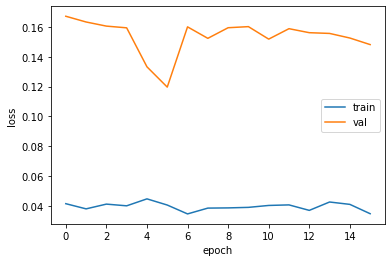

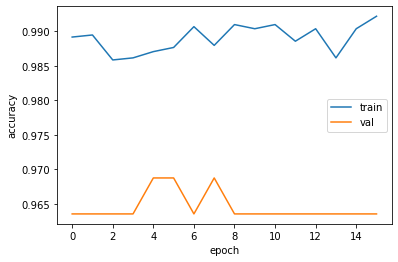

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/50
208/208 [==============================] - 95s 450ms/step - loss: 0.0363 - acc: 0.9888 - val_loss: 0.1570 - val_acc: 0.9635
Epoch 2/50
208/208 [==============================] - 95s 457ms/step - loss: 0.0420 - acc: 0.9892 - val_loss: 0.1642 - val_acc: 0.9635
Epoch 3/50
208/208 [==============================] - 95s 458ms/step - loss: 0.0353 - acc: 0.9898 - val_loss: 0.1444 - val_acc: 0.9688
Epoch 4/50
208/208 [==============================] - 94s 454ms/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.1466 - val_acc: 0.9635
Epoch 5/50
208/208 [==============================] - 95s 459ms/step - loss: 0.0336 - acc: 0.9904 - val_loss: 0.1526 - val_acc: 0.9635
Epoch 6/50
208/208 [==============================] - 93s 448ms/step - loss: 0.0334 - acc: 0.9907 - val_loss: 0.1476 - val_acc: 0.9688
Epoch 7/50
208/208 [==============================] - 94s 454ms/step - loss: 0.0356 - acc: 0.9901 - val_los

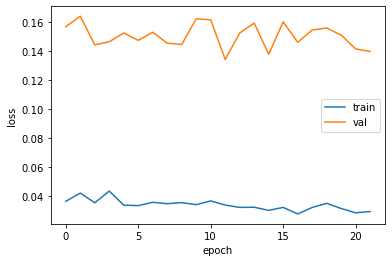

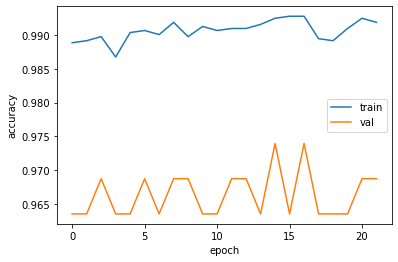

In [11]:
for batch_size in params['batch_size']:
    for lr in params['learning_rate'] :
        
        model_final.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(lr),
                   metrics=['acc'])
        
        train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              rotation_range=20,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2)

        val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

        train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                          classes=['fire', 'non_fire'],
                                                          target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          seed=12345,
                                                          class_mode='categorical')

        validation_generator = val_datagen.flow_from_directory(
                VALIDATION_DATA_DIR,
                classes=['fire', 'non_fire'],
                target_size=(IMG_WIDTH, IMG_HEIGHT),
                batch_size=batch_size,
                shuffle=True,
                seed=12345,
                class_mode='categorical')
        
        history = model_final.fit(train_generator,
                    steps_per_epoch=TRAIN_SAMPLES//batch_size,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=VALIDATAION_SAMPLES//batch_size,
                    callbacks=callback)
        print('---------------------------------------\n')
        print('batch_size: ',batch_size, ', lr: ', lr)
        print('\n')
        print(history.history['loss'])
        print(history.history['acc'])
        print(history.history['val_loss'])
        print(history.history['val_acc'])
        
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(['train','val'])
        plt.show()

        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','val'])
        plt.show()

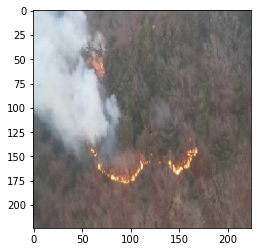

In [5]:
img_path = '/home/lab12/data/산불 이미지 데이터/test/fire/naver_0000.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [6]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

[[0.4425064  0.36373994]]


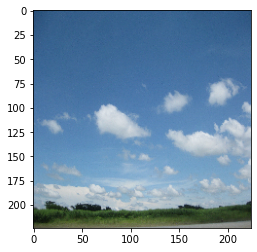

In [7]:
img_path = '/home/lab12/data/산불 이미지 데이터/test/non_fire/00000000.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [8]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

[[0.4704816 0.2962869]]


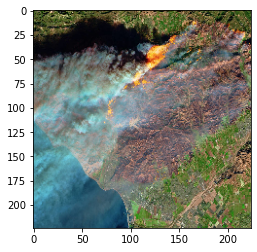

In [16]:
img_path = '/home/lab12/data/산불 이미지 데이터/val/fire/fire.651.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [15]:
prediction = model_final.predict(preprocessed_img)
prediction

array([[0.49176997, 0.26699752]], dtype=float32)

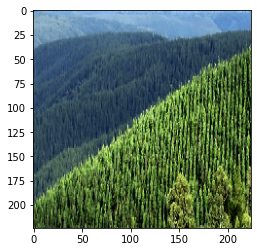

In [17]:
img_path = '/home/lab12/data/산불 이미지 데이터/val/non_fire/non_fire.151.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [18]:
prediction = model_final.predict(preprocessed_img)
prediction

array([[0.44750136, 0.3661416 ]], dtype=float32)